In [1]:
# !pip install matplotlib
# !pip install seaborn
# !pip install sweetviz

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sw
import numpy as np

### Reading Data from computer

In [5]:
df = pd.read_csv("/Users/kurmankarina/Desktop/Social_Network_Ads.csv")
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.tail(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [10]:
print(f'Shape of df: {df.shape}')

Shape of df: (400, 5)


In [11]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


##### Our data is structured and does not need data cleanup

### Add column: 'Age_median'

In [12]:
df["Age_median"] = df['Age'].median()
df = df.astype({'Age_median': 'int'})

In [13]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased,Age_median
0,15624510,Male,19,19000,0,37
1,15810944,Male,35,20000,0,37
2,15668575,Female,26,43000,0,37
3,15603246,Female,27,57000,0,37
4,15804002,Male,19,76000,0,37


### Add column: 'Salary_median'

In [14]:
df["Salary_median"] = df['EstimatedSalary'].median()
df = df.astype({'Salary_median': 'int'})

##### Check the data again

In [15]:
df.tail(5)

,User ID,Gender,Age,EstimatedSalary,Purchased,Age_median,Salary_median
395,15691863,Female,46,41000,1,37,70000
396,15706071,Male,51,23000,1,37,70000
397,15654296,Female,50,20000,1,37,70000
398,15755018,Male,36,33000,0,37,70000
399,15594041,Female,49,36000,1,37,70000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
 5   Age_median       400 non-null    int64 
 6   Salary_median    400 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 22.0+ KB


### Data Analysis: part 1

#### 1. How many females/males in data?

In [17]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

#### 2. How many times female/males purchased add object?

In [18]:
print(f"Male: {df[(df['Purchased'] == 1) & (df['Gender'] == 'Male')]['Purchased'].count()}")
print(f"Female: {df[(df['Purchased'] == 1) & (df['Gender'] == 'Female')]['Purchased'].count()}")

Male: 66
Female: 77


#### 3. Median of the salary for male/female?

In [19]:
print(f"Male median salary: {df[df['Gender'] == 'Male']['EstimatedSalary'].median()}")
print(f"Female median salary: {df[df['Gender'] == 'Female']['EstimatedSalary'].median()}")

Male median salary: 68000.0
Female median salary: 70500.0


### Data Analysis: part 2

#### 1. Amount of purchased depents on salary?

In [20]:
print(f"All purchases: {df[df['Purchased'] == 1]['Purchased'].count()}")
print(f"Amount purchasers with salary less then 30000$: {df[(df['Purchased'] == 1) & (df['EstimatedSalary'] < 30000)]['Purchased'].count()}")
print(f"Amount purchasers with salary from 30000$ to 60000$: {df[(df['Purchased'] == 1) & (df['EstimatedSalary'] <= 30000) & (df['EstimatedSalary'] < 60000)]['Purchased'].count()}")
print(f"Amount purchasers with salary from 60000$ to 90000$: {df[(df['Purchased'] == 1) & (df['EstimatedSalary'] <= 60000) & (df['EstimatedSalary'] < 90000)]['Purchased'].count()}")
print(f"Amount purchasers with salary from 90000$ to 120000$: {df[(df['Purchased'] == 1) & (df['EstimatedSalary'] <= 90000) & (df['EstimatedSalary'] < 120000)]['Purchased'].count()}")
print(f"Amount purchasers with salary from 120000$ to 150000$: {df[(df['Purchased'] == 1) & (df['EstimatedSalary'] <= 120000) & (df['EstimatedSalary'] <= 150000)]['Purchased'].count()}")

All purchases: 143
Amount purchasers with salary less then 30000$: 18
Amount purchasers with salary from 30000$ to 60000$: 20
Amount purchasers with salary from 60000$ to 90000$: 47
Amount purchasers with salary from 90000$ to 120000$: 72
Amount purchasers with salary from 120000$ to 150000$: 105


From these data, we can conclude that the assumption was correct

#### 2. With salary under 20000 people not making a purchases?

In [21]:
df[(df["EstimatedSalary"] < 20000) & (df['Purchased'] == 1)]['Purchased'].count()

0

From these data, we can conclude that the assumption was correct

#### 3. In an age of 25 till 35 purchases making more often

In [22]:
print(f"Amount of purchases made by people under 25 y.o: {df[(df['Age'] < 25) & (df['Purchased'] == 1)]['Purchased'].count()}")
print(f"Amount of purchases made by people older 35 y.o: {df[(df['Age'] > 35) & (df['Purchased'] == 1)]['Purchased'].count()}")
print(f"Amount of purchases made by people from 25 y.o to 35 y.o: {df[(df['Age'] >= 25) & (df['Age'] <= 35) & (df['Purchased'] == 1)]['Purchased'].count()}")

Amount of purchases made by people under 25 y.o: 0
Amount of purchases made by people older 35 y.o: 126
Amount of purchases made by people from 25 y.o to 35 y.o: 17


From this data we can conclude that people that over 35 y.o making purchases more often

#### 4. People older then 35 y.o and geting more then 90000 making purchases more often then everybody else

In [23]:
print(f"People older 35 and makimg over 90000$: {df[(df['Age'] >= 35) & (df['EstimatedSalary'] >= 90000)]['Purchased'].count()}")
print(f"People younger 35 and makimg less then 90000$: {df[(df['Age'] < 35) & (df['EstimatedSalary'] < 90000)]['Purchased'].count()}")

People older 35 and makimg over 90000$: 67
People younger 35 and makimg less then 90000$: 125


Assumtion was wrong, situation is opposite 

#### 5. Female earn less then male?

In [24]:
print(f"Male median salary: {df[df['Gender'] == 'Male']['EstimatedSalary'].median()}")
print(f"Female median salary: {df[df['Gender'] == 'Female']['EstimatedSalary'].median()}")

Male median salary: 68000.0
Female median salary: 70500.0


From the given data assumtion is wrong

#### 6.The average age of a man who makes purchases is greater than the age of women, and because of this, the average salary of this man is greater than that of women

In [25]:
print(f"Male who purchased median age: {df[(df['Gender'] == 'Male') & (df['Purchased'] == 1)]['Age'].median()}")
print(f"Female who purchased median age: {df[(df['Gender'] == 'Female') & (df['Purchased'] == 1)]['Age'].median()}")
print(f"Male who purchased median salary: {df[(df['Gender'] == 'Male') & (df['Purchased'] == 1)]['EstimatedSalary'].median()}")
print(f"Female who purchased median salary: {df[(df['Gender'] == 'Female') & (df['Purchased'] == 1)]['EstimatedSalary'].median()}")

Male who purchased median age: 46.0
Female who purchased median age: 48.0
Male who purchased median salary: 87500.0
Female who purchased median salary: 96000.0


Thus, the average age of men shopping is less than the age of women, and, moreover, the average salary of women is also higher than that of men

### Data Analysis: part 3

##### Let's try to find more information about the data

In [26]:
analyze_one = sw.analyze(df)
analyze_one.show_html('output.html', open_browser=True)

                                             |      | [  0%]   00:00 -> (? left)

Report output.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


##### Let's divide the previous information by gender

In [27]:
report = sw.compare_intra(df, df["Gender"] == "Female", ["Female", "Male"])
report.show_html('Female vs Male.html')

                                             |      | [  0%]   00:00 -> (? left)

Report Female vs Male.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Reading Data from computer 2nd dataset

##### Let's add a new dataset in order to test more theories

##### Checking the data

In [28]:
df2 = pd.read_csv("/Users/kurmankarina/Desktop/test.csv")
df2.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,Self-emp-not-inc,327120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Portugal
1,32,Private,123253,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42,United-States
2,47,Private,232628,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States
3,19,Private,374262,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States
4,46,Self-emp-not-inc,311231,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States


In [29]:
df2.tail(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
894,27,Private,302406,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States
895,17,Private,218124,11th,7,Never-married,Sales,Own-child,White,Female,0,0,20,United-States
896,24,Private,127139,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States
897,35,Private,132879,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States
898,37,Local-gov,44694,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,45,United-States


In [30]:
df2.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,38.576196,194150.017798,10.185762,728.913237,111.929922,41.121246
std,13.079061,104945.494349,2.477511,4355.969800,442.980441,12.397005
min,17.000000,21472.000000,1.000000,0.000000,0.000000,2.000000
25%,28.000000,120925.500000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,181434.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,243670.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,857532.000000,16.000000,99999.000000,2415.000000,99.000000


In [31]:
print(f'Shape of df2: {df.shape}')

Shape of df2: (400, 7)


In [32]:
df2.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              899 non-null    int64 
 1   workclass        899 non-null    object
 2   fnlwgt           899 non-null    int64 
 3   education        899 non-null    object
 4   educational-num  899 non-null    int64 
 5   marital-status   899 non-null    object
 6   occupation       899 non-null    object
 7   relationship     899 non-null    object
 8   race             899 non-null    object
 9   gender           899 non-null    object
 10  capital-gain     899 non-null    int64 
 11  capital-loss     899 non-null    int64 
 12  hours-per-week   899 non-null    int64 
 13  native-country   899 non-null    object
dtypes: int64(6), object(8)
memory usage: 98.5+ KB


In [33]:
df2.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.080842,0.023774,0.087611,0.061419,0.088207
fnlwgt,-0.080842,1.000000,-0.044700,-0.003582,-0.018118,-0.042245
educational-num,0.023774,-0.044700,1.000000,0.104104,0.096853,0.134613
capital-gain,0.087611,-0.003582,0.104104,1.000000,-0.042329,0.077231
capital-loss,0.061419,-0.018118,0.096853,-0.042329,1.000000,0.060963
hours-per-week,0.088207,-0.042245,0.134613,0.077231,0.060963,1.000000


### Data Analysis: part 4

#### Getting more detailed information about the data

In [34]:
analyze_two = sw.analyze(df2)
analyze_two.show_html('output.html', open_browser=True)

                                             |      | [  0%]   00:00 -> (? left)

Report output.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Data Analysis: part 5

##### From the previous data analysis, we found out that people with incomes from 120k to 150k are more likely to make purchases, my assumptions are that these are white people and one with higher education

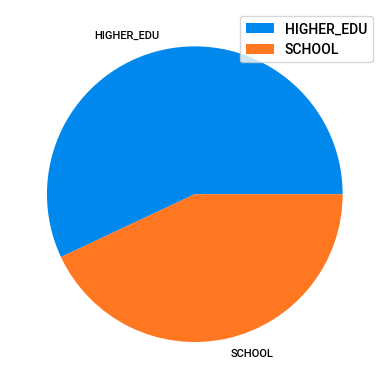

In [35]:
t = df2[(df2['educational-num'] >= 10) & (df2['fnlwgt'] >= 120000) & (df2['fnlwgt'] <= 150000)]['educational-num'].count()
d = df2[(df2['educational-num'] < 10) & (df2['fnlwgt'] >= 120000) & (df2['fnlwgt'] <= 150000)]['educational-num'].count()
y = np.array([t, d])
mylabels = ["HIGHER_EDU", "SCHOOL"]
plt.pie(y, labels = mylabels)
plt.legend()
plt.show() 

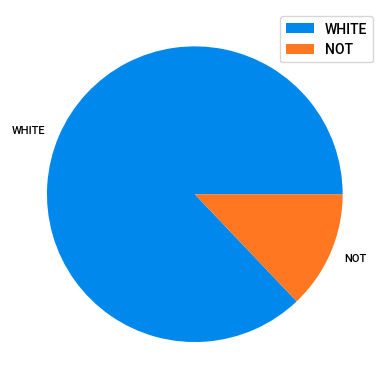

In [36]:
t = df2[(df2['race'] == 'White') & (df2['fnlwgt'] >= 120000) & (df2['fnlwgt'] <= 150000)]['educational-num'].count()
d = df2[(df2['race'] != 'White') & (df2['fnlwgt'] >= 120000) & (df2['fnlwgt'] <= 150000)]['educational-num'].count()
y = np.array([t, d])
mylabels = ["WHITE", "NOT"]
plt.pie(y, labels = mylabels)
plt.legend()
plt.show() 

##### People who get from 120k to 150k are most often those who got higher education and their race is white 

### Data Visualization: part 1

#### 1. Pairwise dependencies of the features

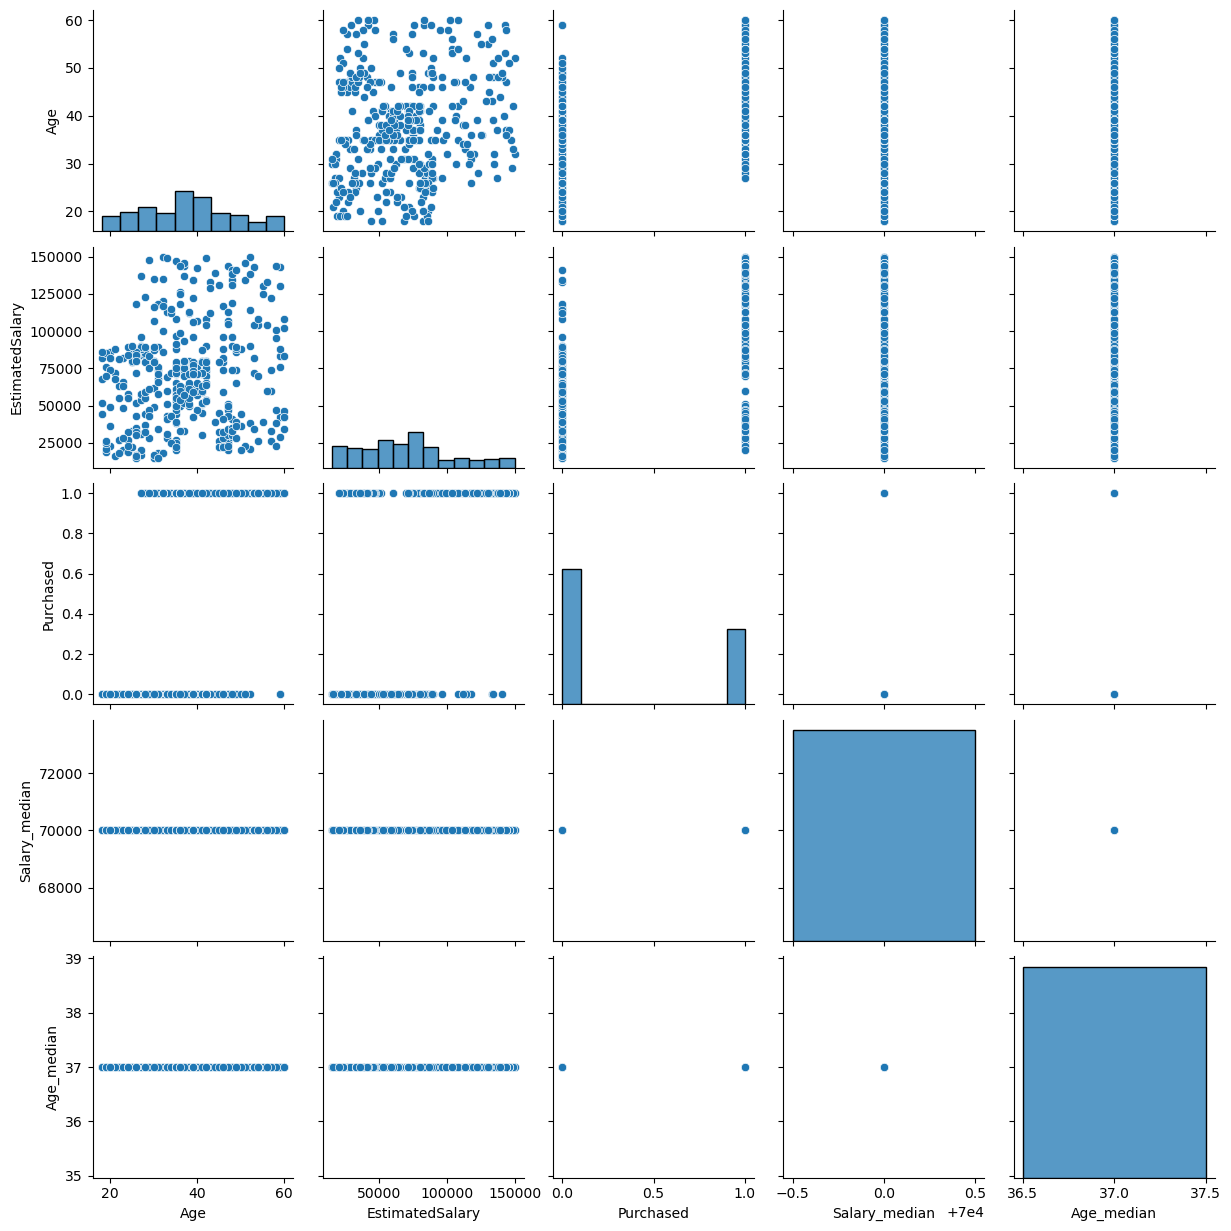

In [170]:
sns.pairplot(df[['Gender', 'Age', 'EstimatedSalary', 'Purchased', 'Salary_median', 'Age_median']]);

### Data Visualization: part 2

#### Purchased pie-chart:

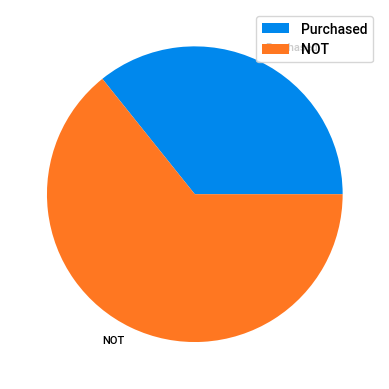

In [35]:
t = df[df['Purchased'] == 1]['Purchased'].count()
d = df[df['Purchased'] == 0]['Purchased'].count()
y = np.array([t, d])
mylabels = ["Purchased", "NOT"]
plt.pie(y, labels = mylabels)
plt.legend()
plt.show() 

#### Age of users:

Gender
Female    AxesSubplot(0.125,0.11;0.775x0.77)
Male      AxesSubplot(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

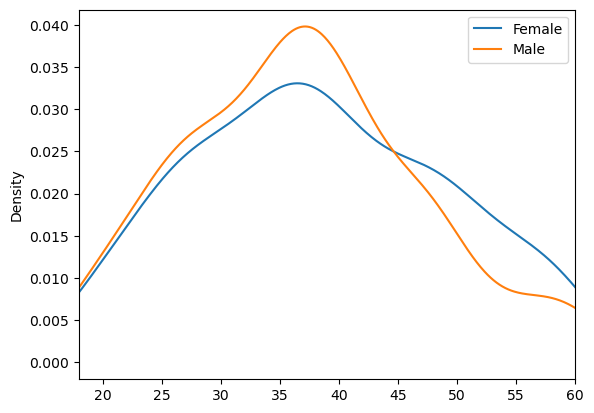

In [167]:
df.groupby('Gender')['Age'].plot(kind='kde', xlim=[18, 60], legend = True)

#### Age and Purchases graf:

Purchased
0    AxesSubplot(0.125,0.11;0.775x0.77)
1    AxesSubplot(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

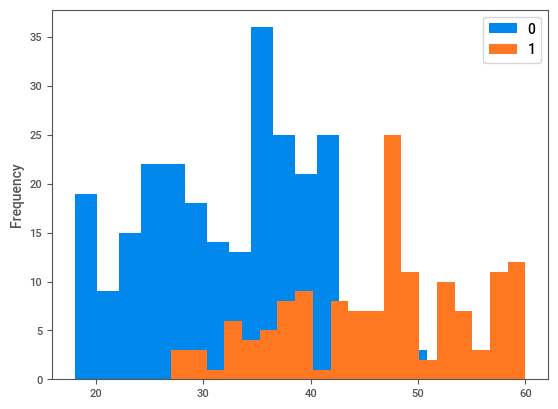

In [25]:
df.groupby('Purchased')['Age'].plot(kind='hist', bins=20, legend = True)

####  Amount of purchased depents on salary?

Purchased
0    AxesSubplot(0.125,0.11;0.775x0.77)
1    AxesSubplot(0.125,0.11;0.775x0.77)
Name: EstimatedSalary, dtype: object

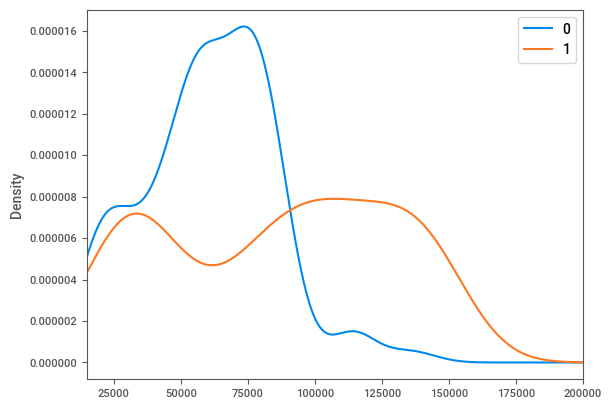

In [38]:
df.groupby('Purchased')['EstimatedSalary'].plot(kind='kde',xlim=[15000, 200000], legend = True)